In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score

In [19]:
def load_data():
    """Load the California housing dataset."""
    housing = fetch_california_housing()
    X = housing.data    # features
    y = housing.target  # target variable
    feature_names = housing.feature_names
    return X, y, feature_names

In [20]:
def train_model(X_train, y_train):
    """Train a linear regression model."""
    # TODO: initialize the linear regression model (LinearRegression()) and fit it
    model = LinearRegression().fit(X_train, y_train)
    return model

In [21]:
def evaluate_model(model, X_test, y_test):
    """Evaluate the trained model on test data."""
    # TODO: evaluate the model on the test data and calculate the MSE
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    return mse

In [22]:
def perform_cross_validation(X_train, y_train):
    """Perform cross-validation to evaluate the model."""
    # TODO: initialize a linear regression model (LinearRegression()) and train it using cross-validation (cross_val_score)
    # Please, use `cv=5` for cross-validation
    model = LinearRegression().fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    print("Cross-Validation Scores:", cv_scores)              # [score1, score2, ..., score5]
    print("Mean Cross-Validation Score:", np.mean(cv_scores)) # mean_score
    return cv_scores

In [23]:
def main():
    # Load the data
    X, y, feature_names = load_data()
    df = pd.DataFrame(X, columns=feature_names)
    df["Target"] = y
    
    # Simple EDA
    print("Basic Statistics:")
    print(df.describe())
    
    # Correlation Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()
    
    # Split the data into training and test sets
    # TODO: split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
    
    # Train the model
    model = train_model(X_train, y_train)
    
    # Evaluate the model
    mse = evaluate_model(model, X_test, y_test)
    
    # Perform cross-validation
    cv_scores = perform_cross_validation(X_train, y_train)

Basic Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.6

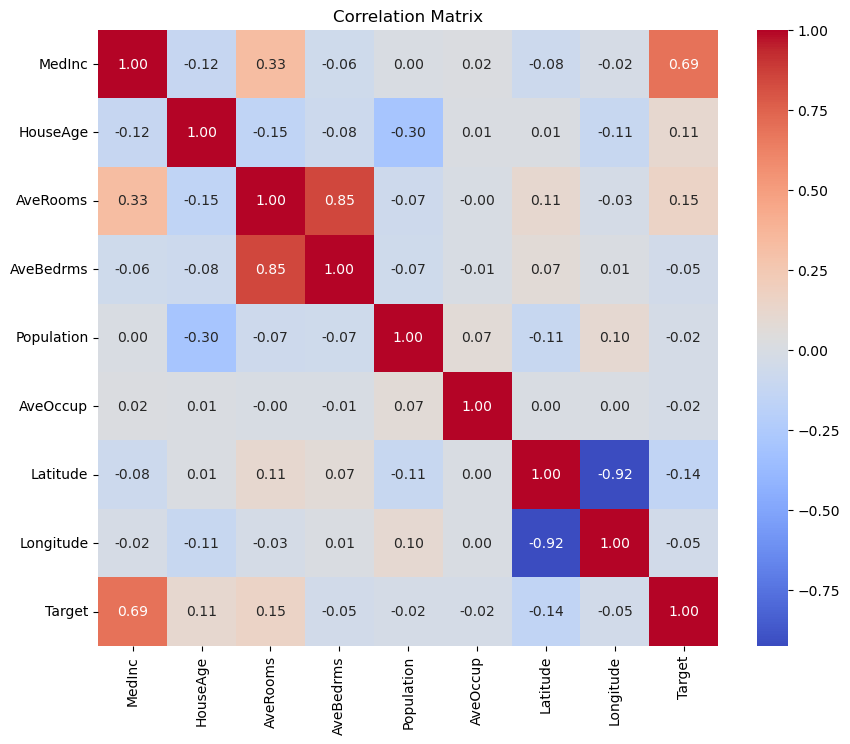

Mean Squared Error: 0.555891598695242
Cross-Validation Scores: [0.62011512 0.61298876 0.6134416  0.61069973 0.60017477]
Mean Cross-Validation Score: 0.6114839952560992


In [24]:
main()